In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Data loading

In [9]:
file_path_demand = "../../extracted_data/totaldemand_nsw.csv"
file_path_temperature = "../../extracted_data/temperature_nsw.csv"

demand_data = pd.read_csv(file_path_demand)
temperature_data = pd.read_csv(file_path_temperature)

merged_data = pd.merge(temperature_data, demand_data, on='DATETIME')

# Data cleaning

In [10]:
demand_data['DATETIME'] = pd.to_datetime(demand_data['DATETIME'], format='%d/%m/%Y %H:%M')

# consider splitting cell here for better structure
temperature_data['DATETIME'] = pd.to_datetime(temperature_data['DATETIME'], format='%d/%m/%Y %H:%M')

# Data pre-processing

In [11]:
merged_data = pd.merge(temperature_data, demand_data, on='DATETIME')

# Exploratory data analysis

## Data statistics

In [14]:
temperature_data.info()
temperature_summary = temperature_data['TEMPERATURE'].describe()
temperature_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220326 entries, 0 to 220325
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   LOCATION     220326 non-null  object        
 1   DATETIME     220326 non-null  datetime64[ns]
 2   TEMPERATURE  220326 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.0+ MB


count    220326.000000
mean         17.418827
std           5.849763
min          -1.300000
25%          13.400000
50%          17.700000
75%          21.300000
max          44.700000
Name: TEMPERATURE, dtype: float64

In [15]:
demand_data.info()
total_demand_summary = demand_data['TOTALDEMAND'].describe()
total_demand_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196513 entries, 0 to 196512
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATETIME     196513 non-null  datetime64[ns]
 1   TOTALDEMAND  196513 non-null  float64       
 2   REGIONID     196513 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.5+ MB


count    196513.000000
mean       8113.145859
std        1299.532774
min        5074.630000
25%        7150.070000
50%        8053.230000
75%        8958.550000
max       14579.860000
Name: TOTALDEMAND, dtype: float64

## Distribution of the data

### Distribution of temperature NSW

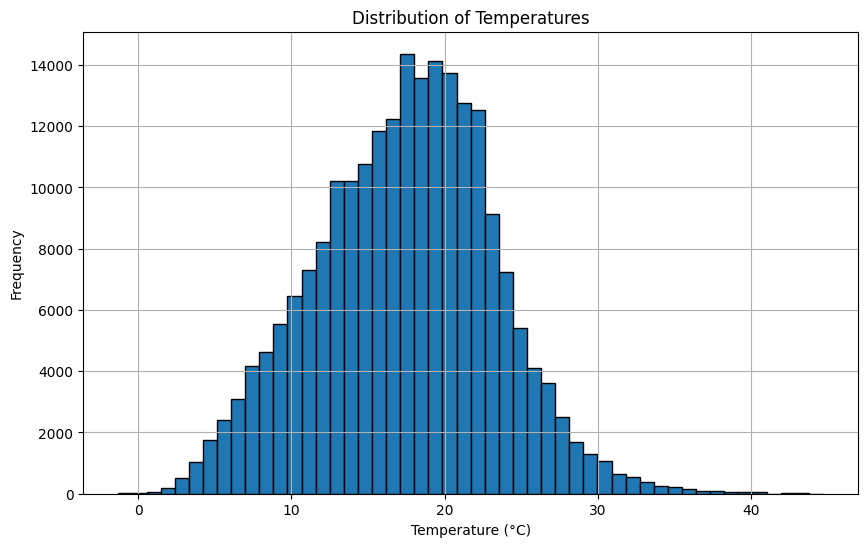

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(temperature_data['TEMPERATURE'], bins=50, edgecolor='black')
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Distribution of total energy NSW

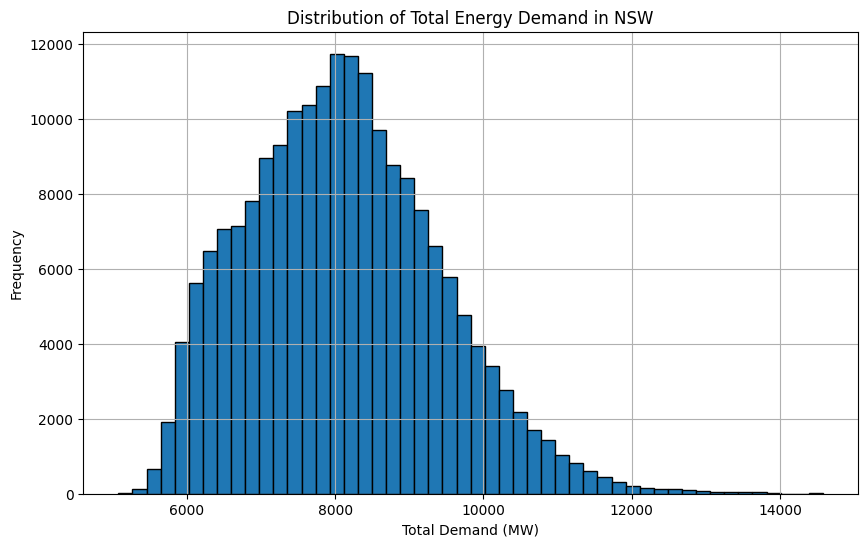

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(demand_data['TOTALDEMAND'], bins=50, edgecolor='black')
plt.title('Distribution of Total Energy Demand in NSW')
plt.xlabel('Total Demand (MW)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Data over time

### Temperature over time

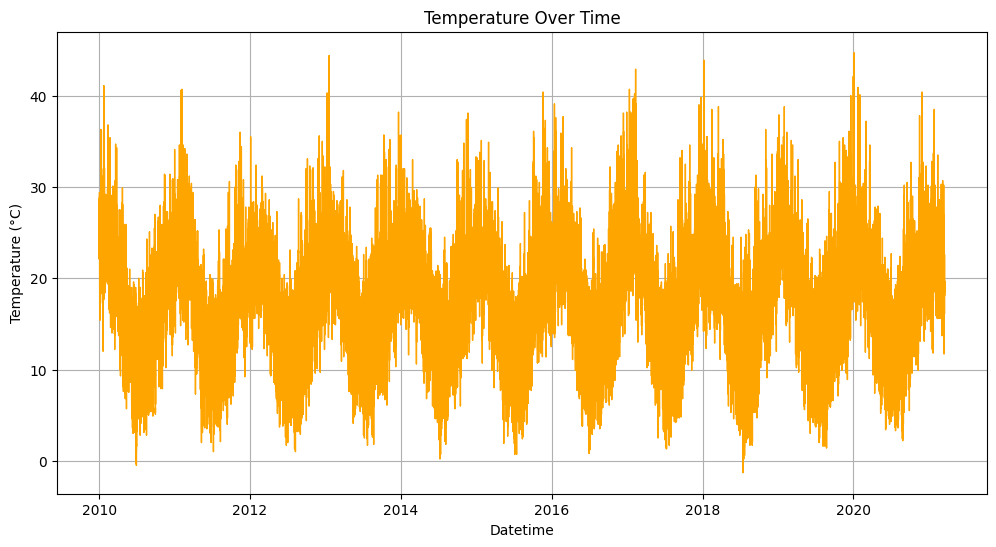

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['DATETIME'], merged_data['TEMPERATURE'], color='orange', linewidth=1)
plt.title('Temperature Over Time')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

### Total energy over time

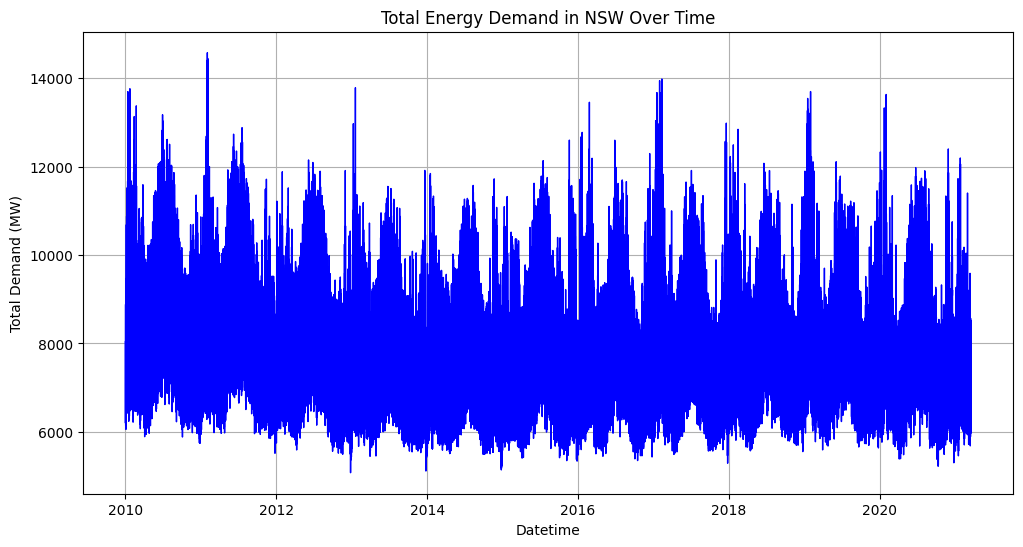

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(demand_data['DATETIME'], demand_data['TOTALDEMAND'], color='blue', linewidth=1)
plt.title('Total Energy Demand in NSW Over Time')
plt.xlabel('Datetime')
plt.ylabel('Total Demand (MW)')
plt.grid(True)
plt.show()

### Temperature and total demand over time

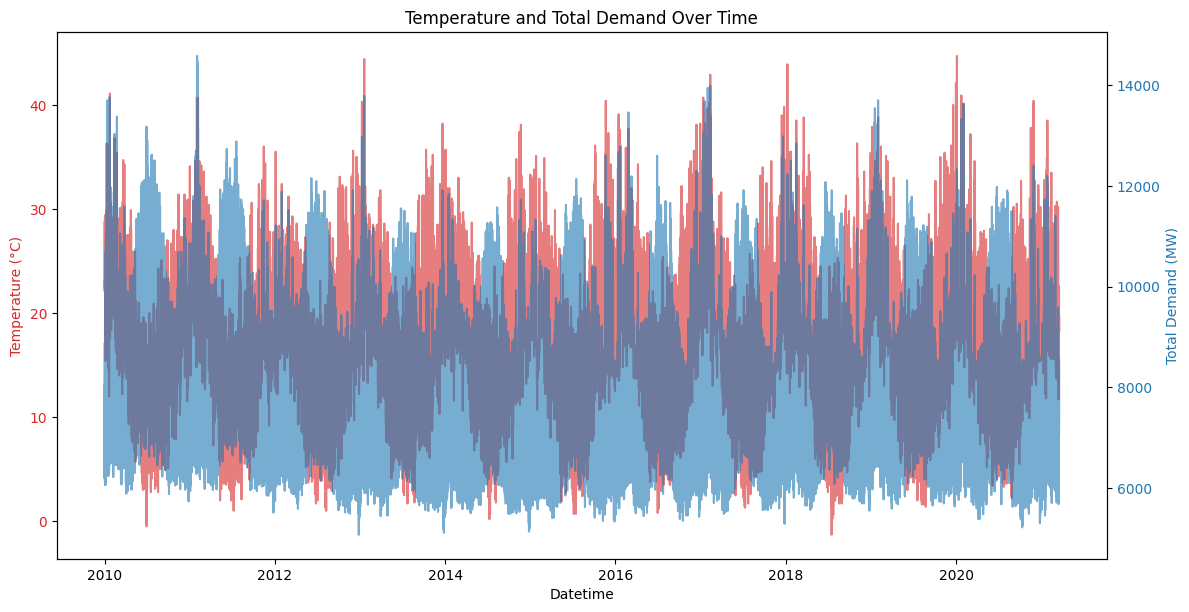

In [20]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Datetime')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax1.plot(merged_data['DATETIME'], merged_data['TEMPERATURE'], color='tab:red', alpha=0.6, label='Temperature')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Total Demand (MW)', color='tab:blue')  # we already handled the x-label with ax1
ax2.plot(merged_data['DATETIME'], merged_data['TOTALDEMAND'], color='tab:blue', alpha=0.6, label='Total Demand')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.title('Temperature and Total Demand Over Time')
plt.show()

### Seasonality and trend analysis

<Figure size 1200x800 with 0 Axes>

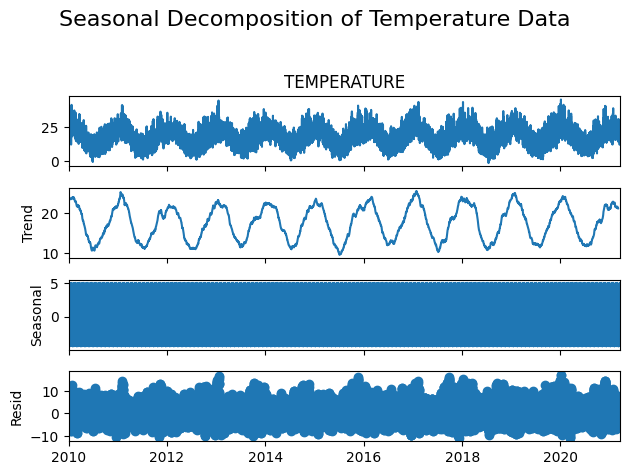

<Figure size 1200x800 with 0 Axes>

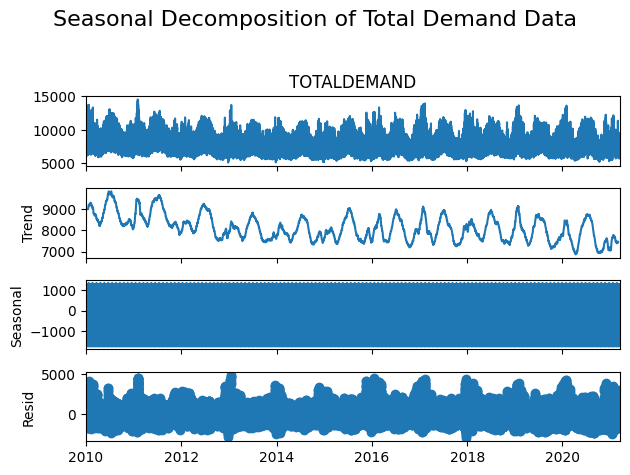

In [33]:
temperature_resampled = merged_data['TEMPERATURE'].resample('H').mean()
demand_resampled = merged_data['TOTALDEMAND'].resample('H').mean()

temperature_resampled_filled = temperature_resampled.fillna(method='ffill').fillna(method='bfill')
demand_resampled_filled = demand_resampled.fillna(method='ffill').fillna(method='bfill')

temperature_decomposition = seasonal_decompose(temperature_resampled_filled, model='additive', period=24*30)
demand_decomposition = seasonal_decompose(demand_resampled_filled, model='additive', period=24*30)

plt.figure(figsize=(12, 8))
temperature_decomposition.plot()
plt.suptitle('Seasonal Decomposition of Temperature Data', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

plt.figure(figsize=(12, 8))
demand_decomposition.plot()
plt.suptitle('Seasonal Decomposition of Total Demand Data', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Daily and monthly averages

## Relationships

### Temperature vs total energy demand

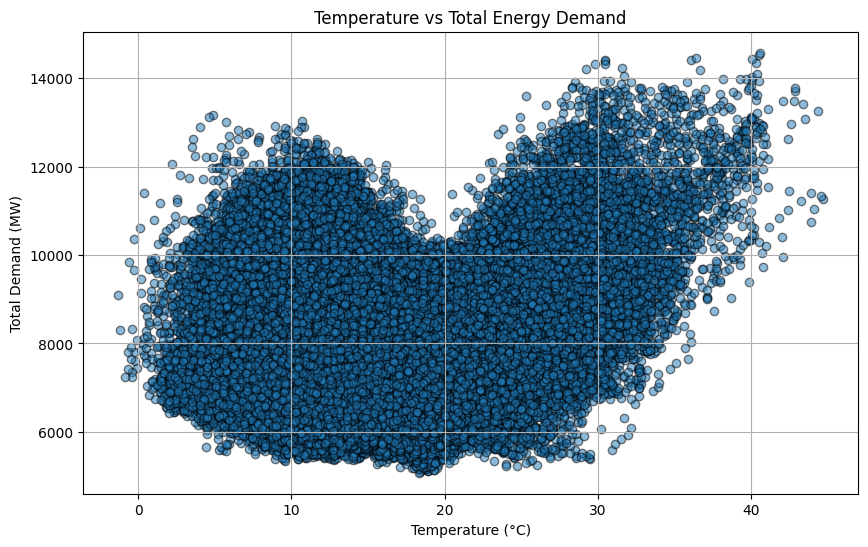

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['TEMPERATURE'], merged_data['TOTALDEMAND'], alpha=0.5, edgecolor='black')
plt.title('Temperature vs Total Energy Demand')
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Demand (MW)')
plt.grid(True)
plt.show()


### Average total demand by temperature bins

In [22]:
correlation = merged_data['TEMPERATURE'].corr(merged_data['TOTALDEMAND'])
temperature_bins = pd.cut(merged_data['TEMPERATURE'], bins=[-5, 10, 20, 30, 40, 50])
average_demand_by_temperature = merged_data.groupby(temperature_bins)['TOTALDEMAND'].mean()

average_demand_by_temperature_df = average_demand_by_temperature.reset_index()
average_demand_by_temperature_df.columns = ['Temperature Range', 'Average Total Demand (MW)']
average_demand_by_temperature_df


,Temperature Range,Average Total Demand (MW)
0,"(-5, 10]",8106.272913
1,"(10, 20]",7932.597554
2,"(20, 30]",8299.341050
3,"(30, 40]",10176.952153
4,"(40, 50]",12323.432394


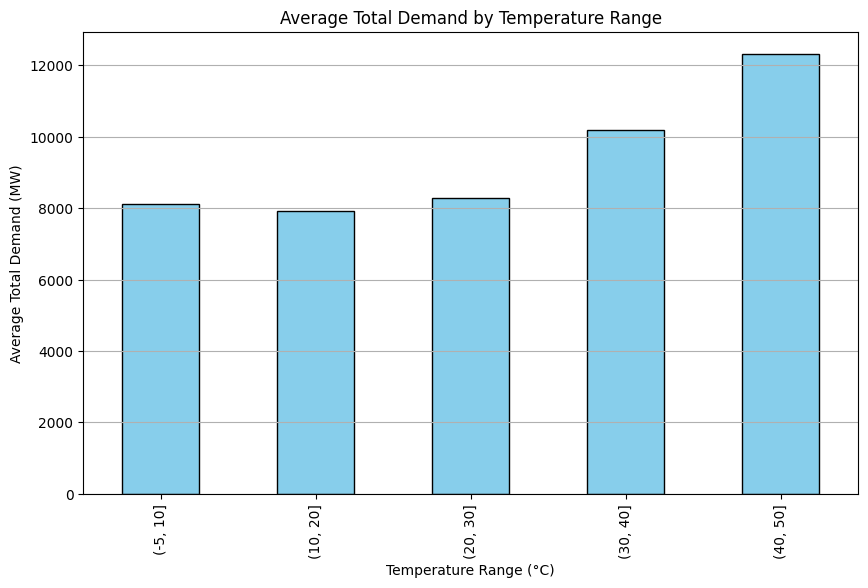

In [23]:
# Visualizing the average total demand by temperature ranges
plt.figure(figsize=(10, 6))
average_demand_by_temperature.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Total Demand by Temperature Range')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Average Total Demand (MW)')
plt.grid(True, axis='y')
plt.show()
